In [164]:
from sklearn.datasets import make_blobs
from scipy import stats, spatial, cluster
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [6]:
plt.xkcd();

In [149]:
num_clust=3
X, y = make_blobs(n_samples=10, centers=num_clust, cluster_std=2.5, random_state=77)

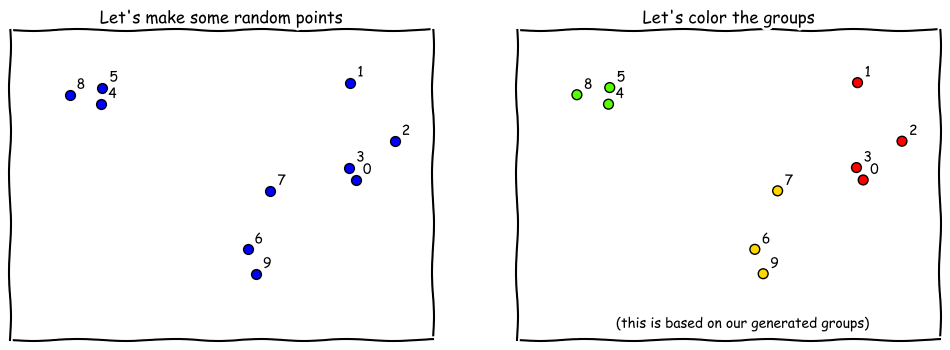

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
ax[0].scatter(X[:, 0], X[:, 1], s=50, cmap='prism');
ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[0].set_title("Let's make some random points");
for i in range(len(X)):
    ax[0].annotate(i, xy=(X[i][0]+0.5, X[i][1]+0.5));
    
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[1].set_title("Let's color the groups");
ax[1].text(-8,-14,"(this is based on our generated groups)");
for i in range(len(X)):
    ax[1].annotate(i, xy=(X[i][0]+0.5, X[i][1]+0.5));

In [151]:
Z = cluster.hierarchy.linkage(X, "complete")

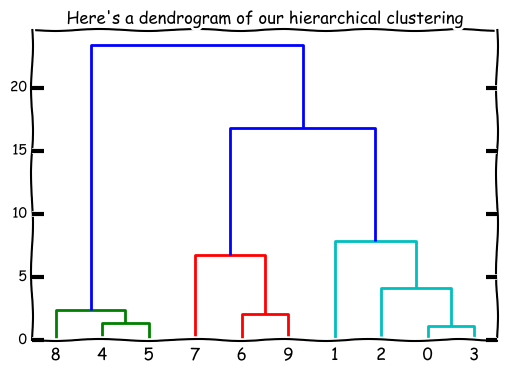

In [152]:
plt.title("Here's a dendrogram of our hierarchical clustering")
cluster.hierarchy.dendrogram(Z);

In [153]:
cut = cluster.hierarchy.fcluster(Z, 10, criterion="distance")
labs = np.zeros_like(cut)
for i in np.unique(cut):
    mask = (cut == i)
    labs[mask] = stats.mode(y[mask])[0]

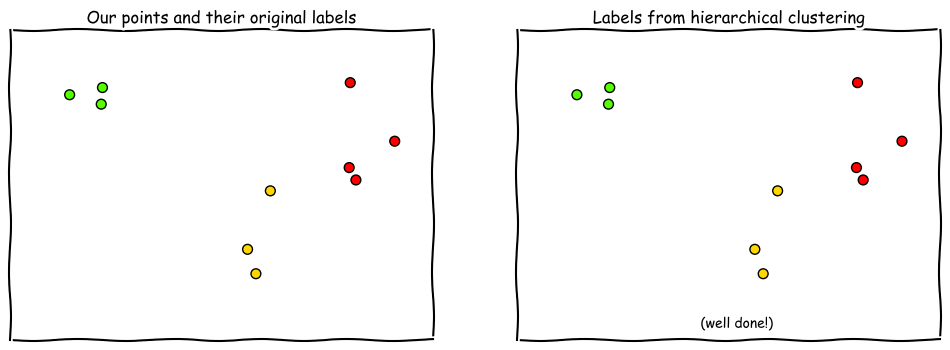

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');
ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[0].set_title("Our points and their original labels");

ax[1].scatter(X[:, 0], X[:, 1], c=labs, s=50, cmap='prism');
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[1].set_title("Labels from hierarchical clustering");
ax[1].text(-2,-14,"(well done!)");

# More points

In [155]:
num_clust=3
X, y = make_blobs(n_samples=1000, centers=num_clust, cluster_std=2.5, random_state=77)

In [156]:
Z = cluster.hierarchy.linkage(X, "complete")

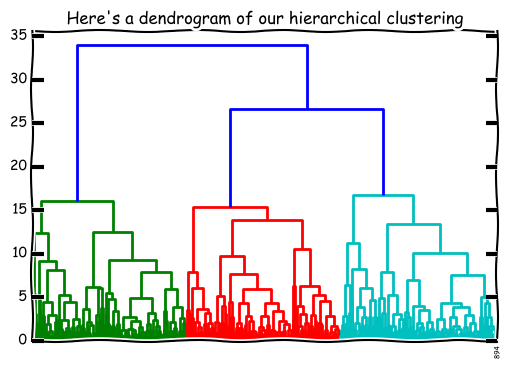

In [157]:
plt.title("Here's a dendrogram of our hierarchical clustering")
cluster.hierarchy.dendrogram(Z);

In [158]:
cut = cluster.hierarchy.fcluster(Z, 20, criterion="distance")
labs = np.zeros_like(cut)
for i in np.unique(cut):
    mask = (cut == i)
    labs[mask] = stats.mode(y[mask])[0]

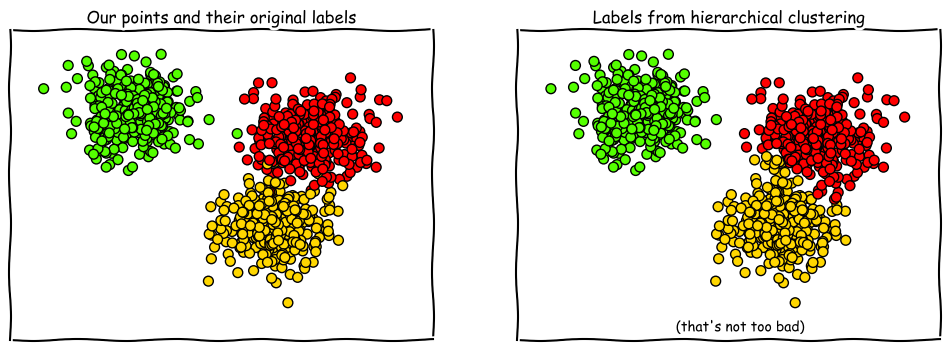

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');
ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[0].set_title("Our points and their original labels");

ax[1].scatter(X[:, 0], X[:, 1], c=labs, s=50, cmap='prism');
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[1].set_title("Labels from hierarchical clustering");
ax[1].text(-5,-19,"(that's not too bad)");

# Generating random dataframes for illustration purposes

In [171]:
random_df = pd.DataFrame(np.random.random(100).reshape(20,5))
random_df.columns = ["X"+str(i) for i in random_df.columns]
random_df.index = ["P"+str(i) for i in random_df.index]
random_df

,X0,X1,X2,X3,X4
P0,0.181292,0.583268,0.278504,0.626822,0.054009
P1,0.929823,0.928972,0.572507,0.907306,0.987818
P2,0.633235,0.534663,0.565524,0.621403,0.799041
P3,0.606797,0.608686,0.186690,0.677027,0.195067
P4,0.405947,0.756335,0.125065,0.035511,0.568734
P5,0.751352,0.349559,0.048715,0.380951,0.741701
P6,0.975449,0.711744,0.671022,0.670835,0.413362
P7,0.595387,0.676233,0.905055,0.186373,0.969080
P8,0.405293,0.565127,0.726107,0.582763,0.877952
P9,0.307332,0.549571,0.778848,0.235420,0.929261


In [172]:
Z2 = cluster.hierarchy.linkage(random_df, "single")

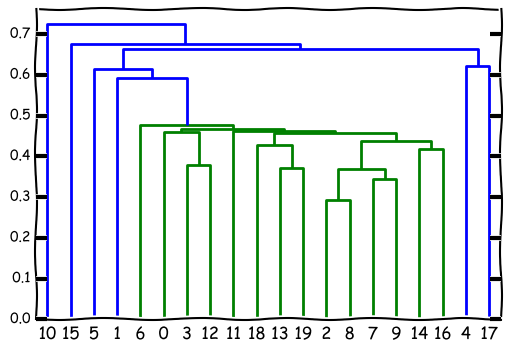

In [174]:
cluster.hierarchy.dendrogram(Z2);

In [183]:
random2 = random_df.iloc[:5,0]

In [184]:
random2 = pd.DataFrame(random2)

In [187]:
for i in random2.index:
    random2[i] = [random2.ix[j,0]-random2.ix[i,0] for j in random2.index]

In [189]:
random2 = random2.iloc[:,1:]

In [194]:
random2 = abs(random2 * 20).astype(int)

In [195]:
random2

,P0,P1,P2,P3,P4
P0,0,299,180,170,89
P1,299,0,118,129,209
P2,180,118,0,10,90
P3,170,129,10,0,80
P4,89,209,90,80,0


In [196]:
spatial.distance.squareform(random2)

array([ 299.,  180.,  170.,   89.,  118.,  129.,  209.,   10.,   90.,   80.])